# Load packages and data

In [3]:
# Loading the required packages to run this notebook
import src.utils.utils as utils
from src.visualisation.VisualiseTrajectories import VisualiseTrajectories
from src.data.Datasets import AISDiscreteRepresentation
from pathlib import Path

# Define the region to look into
region = "Bornholm"
zoom = 8
continuous_representation=False

In [4]:
# Use the VisualiseTrajectories class
fig_size = (10, 10)
visualise_trajectories = VisualiseTrajectories(region, save_figures=True, plot_figures=True, fig_size=fig_size, zoom=zoom,
                                               continuous_representation=continuous_representation)
processed_data_dir =  visualise_trajectories.processed_data_dir

# Load the static Google Map image for the RIO
img = visualise_trajectories.read_static_map()

# Visualise multiple trajectories geographically - Comparison

In [5]:
def plot_comparison(count):
    # Plot Cargo and tankers on one side and fishing vessel trajectory examples on the other
    visualise_trajectories.fig_size = (20,10)
    fig, ax = visualise_trajectories.visualise_static_map(img, subplots=[1, 3])
    fig2, ax2 = visualise_trajectories.visualise_static_map(img, subplots=[1, 3])
    use_cmap = False

    # Plot some cargo and tanker vessel trajectory examples
    # file_name = "RegionBornholm_01062019_30092019_CargTank_14400_315569220_0"
    file_name = "RegionBornholm_01062019_30092019_CargTank_14400_86400_0"
    data_file = processed_data_dir / ("data_" + file_name + ".pkl")
    data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
    data_info_carg_tank_all = utils.read_data_info_file(data_info_file) # Read the info file to know how to read the data file
    tracks_carg_tank_all = visualise_trajectories.plot_multiple_tracks(ax[0], indicies=data_info_carg_tank_all["indicies"][:count],
                                                                       data_path=data_file, use_cmap=use_cmap)
    file_name = "RegionBornholm_01062019_30092019_CargTank_14400_86400_600"
    # file_name = "RegionBornholm_01062019_30092019_CargTank_14400_315569220_600"
    data_file = processed_data_dir / ("data_" + file_name + ".pkl")
    data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
    data_info_carg_tank = utils.read_data_info_file(data_info_file) # Read the info file to know how to read the data file
    tracks_carg_tank = visualise_trajectories.plot_multiple_tracks(ax[1], indicies=data_info_carg_tank["indicies"][:count],
                                                                   data_path=data_file, use_cmap=use_cmap)
    data_set = AISDiscreteRepresentation(file_name, data_info=data_info_carg_tank, indicies=data_info_carg_tank["indicies"][:count])
    df_1 = utils.get_tracks_from_dataset(data_set, continuous_representation=continuous_representation)
    tracks_1 = visualise_trajectories.plot_multiple_tracks(ax[2], df=df_1, data_path=data_file, use_cmap=use_cmap)
    print(f"Max track lengths Cargo/Tankers: {max(tracks_carg_tank_all['Track length'])} and {max(tracks_carg_tank['Track length'])} ({max(tracks_1['Track length'])})")

    # Plot some fishing vessel trajectory examples
    file_name = "RegionBornholm_01062019_30092019_Fish_14400_315569220_0"
    data_file = processed_data_dir / ("data_" + file_name + ".pkl")
    data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
    data_info_fish_all = utils.read_data_info_file(data_info_file) # Read the info file to know how to read the data file
    tracks_fish_all = visualise_trajectories.plot_multiple_tracks(ax2[0], indicies=data_info_fish_all["indicies"][:count],
                                                              data_path=data_file, use_cmap=use_cmap)
    file_name = "RegionBornholm_01062019_30092019_Fish_14400_315569220_600"
    data_file = processed_data_dir / ("data_" + file_name + ".pkl")
    data_info_file = processed_data_dir / ("datasetInfo_" + file_name + ".pkl")
    data_info_fish = utils.read_data_info_file(data_info_file) # Read the info file to know how to read the data file
    tracks_fish = visualise_trajectories.plot_multiple_tracks(ax2[1], indicies=data_info_fish["indicies"][:count],
                                                              data_path=data_file, use_cmap=use_cmap)
    data_set = AISDiscreteRepresentation(file_name, data_info=data_info_fish, indicies=data_info_fish["indicies"][:count])
    df_2 = utils.get_tracks_from_dataset(data_set, continuous_representation=continuous_representation)
    tracks_2 = visualise_trajectories.plot_multiple_tracks(ax2[2], df=df_2, data_path=data_file, use_cmap=use_cmap)
    print(f"Max track lengths Fishing: {max(tracks_fish_all['Track length'])} and {max(tracks_fish['Track length'])} ({max(tracks_2['Track length'])})")

Max track lengths Cargo/Tankers: 4008 and 84 (84)
Max track lengths Fishing: 17801 and 300 (300)


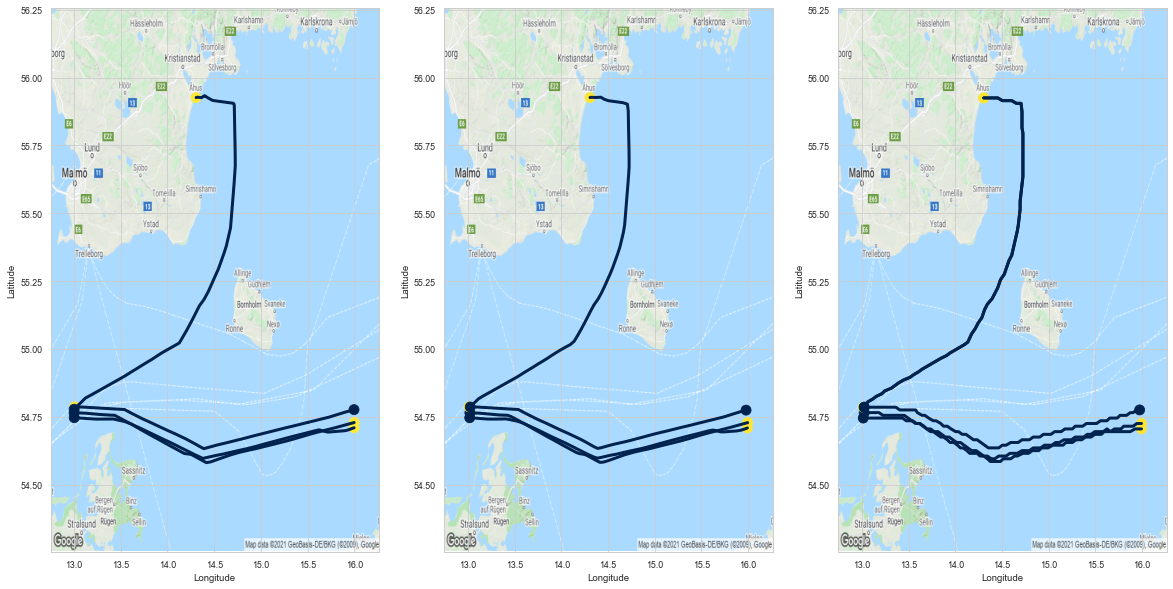

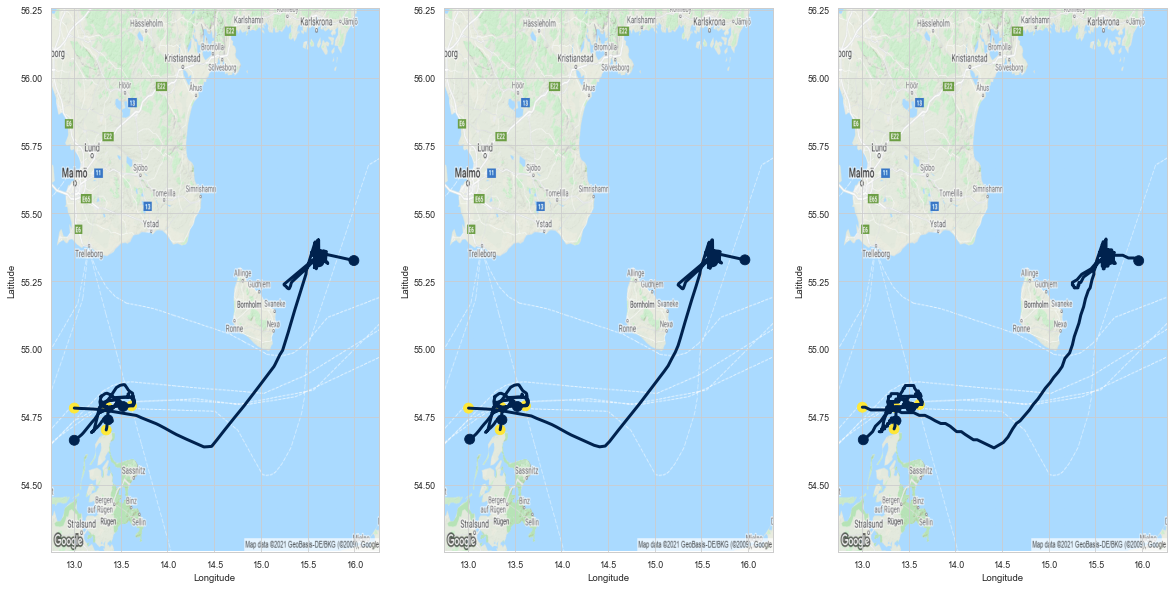

In [6]:
plot_comparison(5)

Max track lengths Cargo/Tankers: 4008 and 84 (84)
Max track lengths Fishing: 35146 and 664 (664)


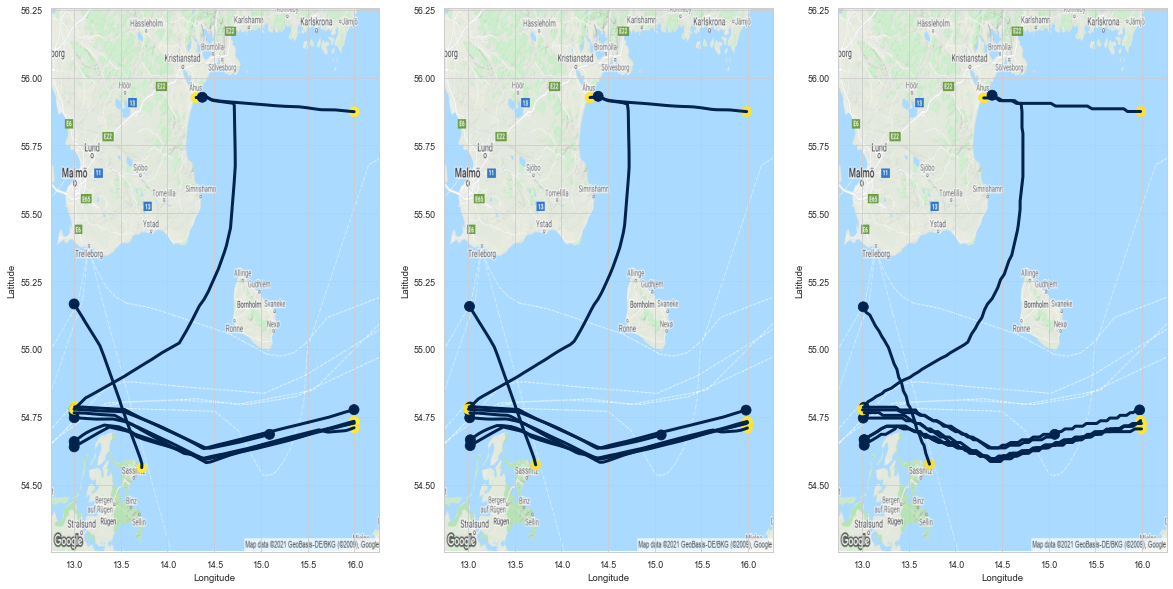

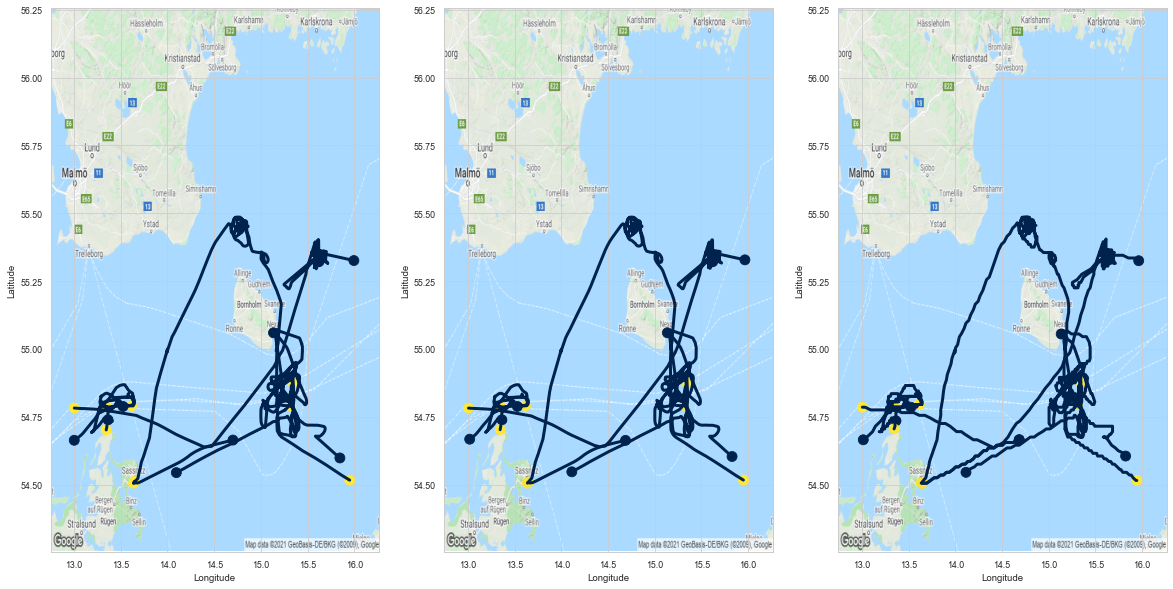

In [7]:
plot_comparison(10)

Max track lengths Cargo/Tankers: 4308 and 84 (84)
Max track lengths Fishing: 35146 and 754 (754)


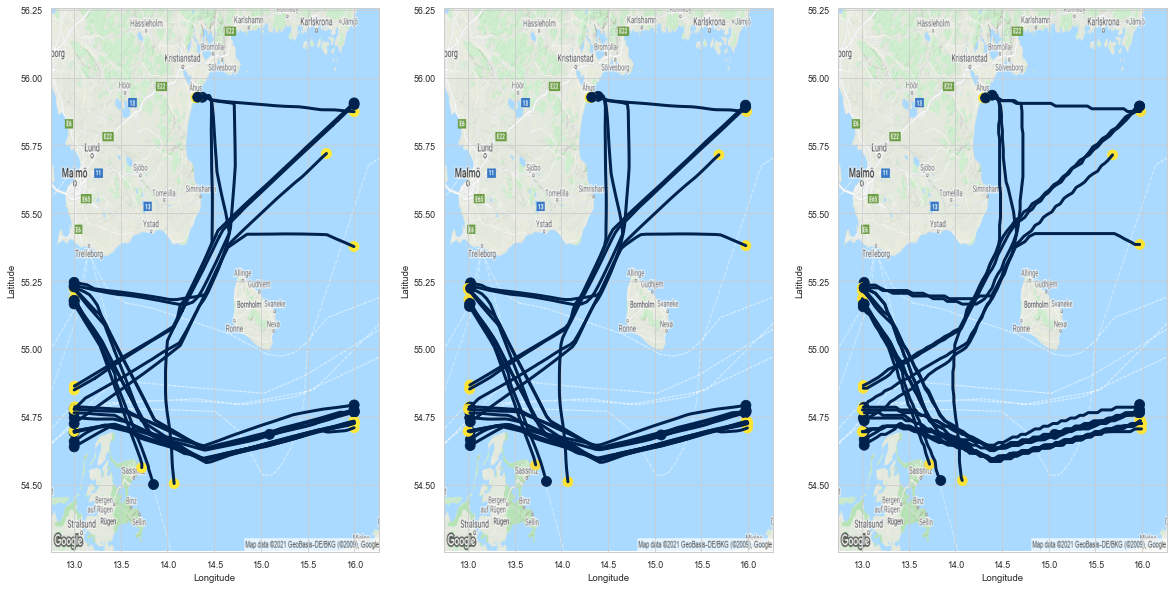

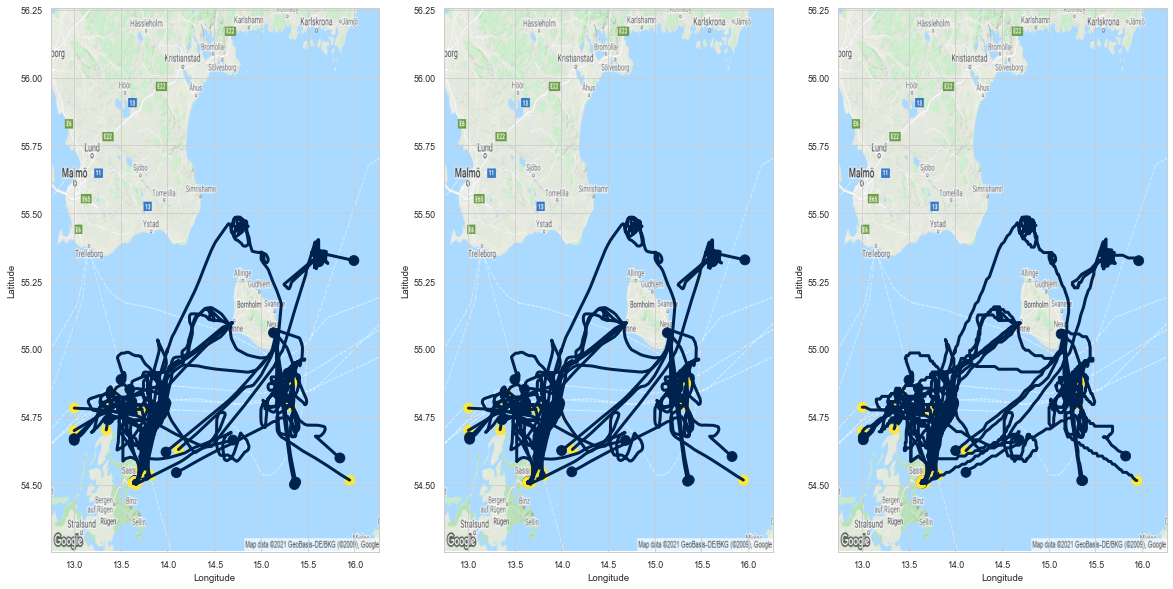

In [8]:
plot_comparison(25)

In [ ]:
plot_comparison(50)

Max track lengths Cargo/Tankers: 4772 and 84 (84)
